In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv


In [2]:
bengaluru=pd.read_csv('/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv')

In [3]:
bengaluru.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
8537,Plot Area,Ready To Move,BTM 4th Stage,1 Bedroom,NaN,600,1.0,0.0,58.00
11989,Super built-up Area,Ready To Move,Kanakpura Road,3 BHK,PuandHi,1843,3.0,2.0,95.00
7537,Plot Area,Ready To Move,Yediyur,4 Bedroom,NaN,1140,3.0,2.0,225.00
13132,Plot Area,Ready To Move,1st Block Koramangala,4 Bedroom,NaN,1200,5.0,1.0,350.00
12407,Super built-up Area,Ready To Move,Billekahalli,2 BHK,Raony C,950,2.0,2.0,56.00
5704,Super built-up Area,Ready To Move,Attibele,2 BHK,Inenshe,850,1.0,1.0,25.00
2586,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,NaN,1035,2.0,1.0,39.33
7322,Super built-up Area,Ready To Move,Hebbal,3 BHK,SNontle,2650,4.0,3.0,199.00
1756,Plot Area,Ready To Move,Whitefield,4 Bedroom,NaN,4000,4.0,2.0,330.00
2430,Built-up Area,Ready To Move,Ramakrishnappa Layout,3 BHK,PeBayle,2770,3.0,1.0,460.00


In [4]:
#Data Preprocessing
# 1.Gathering Data [Done]
# 2.Accessing Data
#       a.Incorrect data types[area_type,availability,size,total_sqft,bath,balcony]
#       b.Missing values[location,size,society,bath,balcony]
#       c.Outliers present[size,bath]

In [5]:
#Shape of the data 
bengaluru.shape

(13320, 9)

In [6]:
#Data type of columns
bengaluru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
#To find the total number of null elements in each column
bengaluru.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
#Mathematical columns
bengaluru.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [9]:
# 1. Location

In [10]:
bengaluru['location'].value_counts()

Whitefield            540
Sarjapur  Road        399
Electronic City       302
Kanakpura Road        273
Thanisandra           234
                     ... 
Duvasapalya             1
Queens Road             1
singapura paradise      1
Richmond Road           1
MRCR Layout             1
Name: location, Length: 1305, dtype: int64

In [11]:
#Filling the NaN element with the majority ones
bengaluru['location']=bengaluru['location'].fillna('Whitefield')

In [12]:
bengaluru.isnull().sum()

area_type          0
availability       0
location           0
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [13]:
#The 'locations' which are in the data less than 10 times, just referring them as 'Others'

In [14]:
bengaluru.location=bengaluru.location.apply(lambda x: x.strip())
location = bengaluru['location'].value_counts()
location

Whitefield                   542
Sarjapur  Road               399
Electronic City              304
Kanakpura Road               273
Thanisandra                  237
                            ... 
Lakshmipura Vidyaanyapura      1
Ashraya Layout                 1
Sadhguru Layout                1
6th Block Jayanagar            1
Subramanya Nagar               1
Name: location, Length: 1294, dtype: int64

In [15]:
location.values.sum()

13320

In [16]:
len(location[location<=10])

1053

In [17]:
location_less_than_10=location[location<=10]
location_less_than_10

Naganathapura                10
Ganga Nagar                  10
Sadashiva Nagar              10
Nagadevanahalli              10
Dairy Circle                 10
                             ..
Lakshmipura Vidyaanyapura     1
Ashraya Layout                1
Sadhguru Layout               1
6th Block Jayanagar           1
Subramanya Nagar              1
Name: location, Length: 1053, dtype: int64

In [18]:
bengaluru.location=bengaluru.location.apply(lambda x: 'Others' if x in location_less_than_10 else x)
bengaluru.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                      Others
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13320, dtype: object

In [19]:
bengaluru['location'].value_counts()

Others                2885
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Tindlu                  11
Pattandur Agrahara      11
Narayanapura            11
Marsur                  11
Kodigehalli             11
Name: location, Length: 242, dtype: int64

In [20]:
# 2. Area Type

#Converting the data type into 'category' because only four types are present['Super built-up Area','Built-up Area','Plot Area','Carpet Area']

In [21]:
bengaluru['area_type']=bengaluru['area_type'].astype('category')

In [22]:
bengaluru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   area_type     13320 non-null  category
 1   availability  13320 non-null  object  
 2   location      13320 non-null  object  
 3   size          13304 non-null  object  
 4   society       7818 non-null   object  
 5   total_sqft    13320 non-null  object  
 6   bath          13247 non-null  float64 
 7   balcony       12711 non-null  float64 
 8   price         13320 non-null  float64 
dtypes: category(1), float64(3), object(5)
memory usage: 845.8+ KB


In [23]:
bengaluru.isnull().sum()

area_type          0
availability       0
location           0
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [24]:
# 3. Size

In [25]:
bengaluru['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13320, dtype: object

In [26]:
#Removing BHK,bedroom and RK from the 'size' column
bengaluru['size']=bengaluru['size'].str.split().str[0]
bengaluru['size']

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: size, Length: 13320, dtype: object

In [27]:
bengaluru['size'].value_counts()

2     5528
3     4857
4     1417
1      656
5      356
6      221
7      100
8       89
9       54
10      14
11       4
27       1
13       1
43       1
16       1
12       1
14       1
18       1
19       1
Name: size, dtype: int64

In [28]:
#Dropping the NaN elements
bengaluru.dropna(subset=['size'],inplace=True)

In [29]:
#Converting the data type of 'size' column to int32 to remove the decimal point
bengaluru['size']=bengaluru['size'].astype('int32')

In [30]:
import seaborn as sns

In [31]:
import matplotlib.pyplot as plt

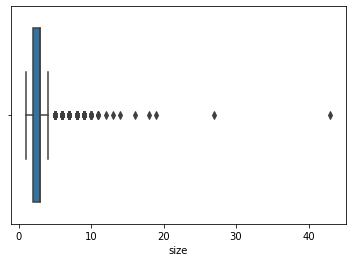

In [32]:
sns.boxplot(bengaluru['size'])

In [33]:
#Removing the outliers which are more than 10 beacuse they are insane
bengaluru=bengaluru.drop(bengaluru[bengaluru['size']>10].index)

In [34]:
#Converting the data type to category because there are only 10 categories present now
bengaluru['size']=bengaluru['size'].astype('category')

In [35]:
bengaluru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13292 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   area_type     13292 non-null  category
 1   availability  13292 non-null  object  
 2   location      13292 non-null  object  
 3   size          13292 non-null  category
 4   society       7803 non-null   object  
 5   total_sqft    13292 non-null  object  
 6   bath          13235 non-null  float64 
 7   balcony       12703 non-null  float64 
 8   price         13292 non-null  float64 
dtypes: category(2), float64(3), object(4)
memory usage: 857.3+ KB


In [36]:
# 4. Society

In [37]:
bengaluru['society'].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
BancyRe     1
DSoodSh     1
Marnara     1
Soestin     1
IJent A     1
Name: society, Length: 2676, dtype: int64

In [38]:
#Filled the NaN values with 'Information not Available'
bengaluru['society']=bengaluru['society'].fillna('Information Not Available')


In [39]:
bengaluru['society'].value_counts()

Information Not Available    5489
GrrvaGr                        80
PrarePa                        76
Prtates                        59
Sryalan                        59
                             ... 
BancyRe                         1
DSoodSh                         1
Marnara                         1
Soestin                         1
IJent A                         1
Name: society, Length: 2677, dtype: int64

In [40]:
#The 'society' which are in the data less than 10 times, just referring them as 'Others'

In [41]:
bengaluru.society.apply(lambda x: x.strip())
society = bengaluru['society'].value_counts()
society

Information Not Available    5489
GrrvaGr                        80
PrarePa                        76
Prtates                        59
Sryalan                        59
                             ... 
BancyRe                         1
DSoodSh                         1
Marnara                         1
Soestin                         1
IJent A                         1
Name: society, Length: 2677, dtype: int64

In [42]:
society.values.sum()

13292

In [43]:
len(society[society<=10])

2547

In [44]:
society_less_than_10=society[society<=10]
society_less_than_10

Maity W    10
SoitaCa    10
SoisoCa    10
Shestlo    10
Neisei     10
           ..
BancyRe     1
DSoodSh     1
Marnara     1
Soestin     1
IJent A     1
Name: society, Length: 2547, dtype: int64

In [45]:
bengaluru.society=bengaluru.society.apply(lambda x: 'Others' if x in society_less_than_10 else x)
bengaluru.society

0                           Others
1                          Theanmp
2        Information Not Available
3                          Soiewre
4        Information Not Available
                   ...            
13315                       Others
13316    Information Not Available
13317                       Others
13318                       Others
13319    Information Not Available
Name: society, Length: 13292, dtype: object

In [46]:
bengaluru['society'].value_counts()

Information Not Available    5489
Others                       5065
GrrvaGr                        80
PrarePa                        76
Prtates                        59
                             ... 
Peide L                        11
Wiowsri                        11
SheldGr                        11
Pronyt                         11
SPavenc                        11
Name: society, Length: 131, dtype: int64

In [47]:
bengaluru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13292 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   area_type     13292 non-null  category
 1   availability  13292 non-null  object  
 2   location      13292 non-null  object  
 3   size          13292 non-null  category
 4   society       13292 non-null  object  
 5   total_sqft    13292 non-null  object  
 6   bath          13235 non-null  float64 
 7   balcony       12703 non-null  float64 
 8   price         13292 non-null  float64 
dtypes: category(2), float64(3), object(4)
memory usage: 857.3+ KB


In [48]:
# 5.Availabilty

In [49]:
bengaluru['availability'].value_counts()

Ready To Move    10570
18-Dec             307
18-May             295
18-Apr             270
18-Aug             200
                 ...  
16-Nov               1
16-Jul               1
17-Jan               1
16-Jan               1
15-Jun               1
Name: availability, Length: 80, dtype: int64

In [50]:
#Referring the dates as 'Available Soon' to convert the column into consistent data type 

In [51]:
mask1=[i for i in bengaluru['availability'] if i not in ['Ready To Move','Immediate Possession']]
bengaluru['availability']=bengaluru['availability'].replace(mask1,'Available Soon')
bengaluru['availability']

0        Available Soon
1         Ready To Move
2         Ready To Move
3         Ready To Move
4         Ready To Move
              ...      
13315     Ready To Move
13316     Ready To Move
13317     Ready To Move
13318    Available Soon
13319     Ready To Move
Name: availability, Length: 13292, dtype: object

In [52]:
#Converting the data type of 'availabilty' column to category because there are 3 categories['Available Soon','Immediate Possession','Ready To Move']
bengaluru['availability']=bengaluru['availability'].astype('category')
bengaluru['availability']

0        Available Soon
1         Ready To Move
2         Ready To Move
3         Ready To Move
4         Ready To Move
              ...      
13315     Ready To Move
13316     Ready To Move
13317     Ready To Move
13318    Available Soon
13319     Ready To Move
Name: availability, Length: 13292, dtype: category
Categories (2, object): ['Available Soon', 'Ready To Move']

In [53]:
bengaluru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13292 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   area_type     13292 non-null  category
 1   availability  13292 non-null  category
 2   location      13292 non-null  object  
 3   size          13292 non-null  category
 4   society       13292 non-null  object  
 5   total_sqft    13292 non-null  object  
 6   bath          13235 non-null  float64 
 7   balcony       12703 non-null  float64 
 8   price         13292 non-null  float64 
dtypes: category(3), float64(3), object(3)
memory usage: 766.5+ KB


In [54]:
# 6.Total Square feet

In [55]:
#Doing Average of the square feets which are given in the range (for example 2400-2600)
def sqft(x):
    t=x.split('-')
    if len(t)==2:
        return (float(t[0])+float(t[1]))/2
    try:
        return x
    except:
        return None

In [56]:
bengaluru.total_sqft=bengaluru.total_sqft.apply(sqft)

In [57]:
bengaluru.total_sqft

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13292, dtype: object

In [58]:
#Converting different units to square feet 
def change_to_sqft(x):
    if("Sq. Meter" in str(x)):
        y=x.split("S")
        z=float(y[0])*10.76
        return z
    
    elif("Sq. Yards" in str(x)):
        y=x.split("S")
        z=float(y[0])*9
        return z
    
    elif("Guntha" in str(x)):
        y=x.split("G")
        z=float(y[0])*1088.98
        return z
    
    elif("Acres" in str(x)):
        y=x.split("A")
        z=float(y[0])*43560
        return z
    
    elif("Perch" in str(x)):
        y=x.split("P")
        z=float(y[0])*272.25
        return z
    
    elif("Cents" in str(x)):
        y=x.split("C")
        z=float(y[0])*435.6
        return z
    
    elif("Grounds" in str(x)):
        y=x.split("G")
        z=float(y[0])*2400
        return z
    
    else:
        return x

In [59]:
bengaluru['total_sqft']=bengaluru['total_sqft'].apply(change_to_sqft)

In [60]:
#Converting the data type of 'total_sqft' in to float64
bengaluru['total_sqft']=bengaluru['total_sqft'].astype('float64')

In [61]:
bengaluru['total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13292, dtype: float64

In [62]:
bengaluru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13292 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   area_type     13292 non-null  category
 1   availability  13292 non-null  category
 2   location      13292 non-null  object  
 3   size          13292 non-null  category
 4   society       13292 non-null  object  
 5   total_sqft    13292 non-null  float64 
 6   bath          13235 non-null  float64 
 7   balcony       12703 non-null  float64 
 8   price         13292 non-null  float64 
dtypes: category(3), float64(4), object(2)
memory usage: 766.5+ KB


In [63]:
bengaluru.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
5393,Super built-up Area,Ready To Move,Others,9,Information Not Available,42000.0,8.0,3.0,175.00
2386,Super built-up Area,Ready To Move,Sector 7 HSR Layout,3,Saitya,1760.0,3.0,2.0,145.00
10041,Super built-up Area,Ready To Move,Mahadevpura,3,Information Not Available,1505.0,3.0,2.0,78.00
13088,Super built-up Area,Ready To Move,Uttarahalli,3,Others,1290.0,2.0,2.0,56.12
970,Built-up Area,Ready To Move,Others,1,Information Not Available,530.0,1.0,1.0,20.00
3869,Super built-up Area,Available Soon,Whitefield,2,Information Not Available,1200.0,2.0,1.0,45.84
11783,Built-up Area,Ready To Move,8th Phase JP Nagar,5,Information Not Available,1730.0,5.0,2.0,75.00
12343,Super built-up Area,Ready To Move,Sarjapur Road,2,Others,1197.0,2.0,1.0,56.86
5574,Super built-up Area,Ready To Move,Kanakpura Road,3,PuandHi,1843.0,3.0,2.0,82.00
6319,Plot Area,Ready To Move,TC Palaya,4,Information Not Available,600.0,4.0,0.0,65.00


In [64]:
# 7.Balcony

In [65]:
bengaluru['balcony'].value_counts()

2.0    5112
1.0    4897
3.0    1670
0.0    1024
Name: balcony, dtype: int64

In [66]:
#Filling the NaN values to the mode of the column which is 2.0
bengaluru["balcony"]=bengaluru["balcony"].fillna(bengaluru["balcony"].mode()[0])

In [67]:
bengaluru["balcony"]=bengaluru["balcony"].astype('int32')

In [68]:
#Converting the data type to 'category' because there are 3 categories present now
bengaluru["balcony"]=bengaluru["balcony"].astype('category')

In [69]:
bengaluru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13292 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   area_type     13292 non-null  category
 1   availability  13292 non-null  category
 2   location      13292 non-null  object  
 3   size          13292 non-null  category
 4   society       13292 non-null  object  
 5   total_sqft    13292 non-null  float64 
 6   bath          13235 non-null  float64 
 7   balcony       13292 non-null  category
 8   price         13292 non-null  float64 
dtypes: category(4), float64(3), object(2)
memory usage: 675.8+ KB


In [70]:
bengaluru.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
4166,Super built-up Area,Ready To Move,Doddathoguru,2,Others,915.0,2.0,1,32.0
12321,Super built-up Area,Ready To Move,Brookefield,2,Others,1382.0,2.0,2,84.5
6263,Super built-up Area,Ready To Move,Kalyan nagar,2,Others,1198.0,2.0,1,65.0
2068,Super built-up Area,Ready To Move,Brookefield,3,Others,1476.0,3.0,2,105.0
8534,Super built-up Area,Ready To Move,OMBR Layout,2,Information Not Available,1165.0,2.0,2,88.5


In [71]:
# 8.Bath

In [72]:
bengaluru['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      271
7.0      102
8.0       64
9.0       42
10.0      13
12.0       6
13.0       2
11.0       2
14.0       1
Name: bath, dtype: int64

In [73]:
#Filling the NaN values to the mode of the column which is 2.0
bengaluru["bath"]=bengaluru["bath"].fillna(bengaluru["bath"].mode()[0])

In [74]:
#Converting the data type to 'int32' 
bengaluru["bath"]=bengaluru["bath"].astype('int32')

In [75]:
bengaluru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13292 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   area_type     13292 non-null  category
 1   availability  13292 non-null  category
 2   location      13292 non-null  object  
 3   size          13292 non-null  category
 4   society       13292 non-null  object  
 5   total_sqft    13292 non-null  float64 
 6   bath          13292 non-null  int32   
 7   balcony       13292 non-null  category
 8   price         13292 non-null  float64 
dtypes: category(4), float64(2), int32(1), object(2)
memory usage: 623.9+ KB


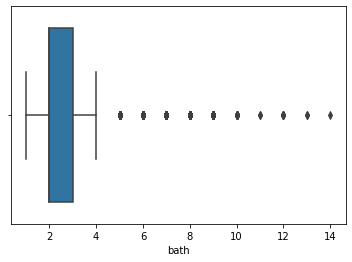

In [76]:
sns.boxplot(bengaluru['bath'])

In [77]:
#Removing the outliers which are insane
bengaluru=bengaluru.drop(bengaluru[bengaluru['bath']>5].index)

In [78]:
bengaluru["bath"]=bengaluru["bath"].astype('int32')

In [79]:
bengaluru['bath']

0        2
1        5
2        2
3        3
4        2
        ..
13315    4
13316    5
13317    2
13318    4
13319    1
Name: bath, Length: 12789, dtype: int32

In [80]:
#Converting the data type to 'category' because there are 5 categories present now
bengaluru["bath"]=bengaluru["bath"].astype('category')

In [81]:
bengaluru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12789 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   area_type     12789 non-null  category
 1   availability  12789 non-null  category
 2   location      12789 non-null  object  
 3   size          12789 non-null  category
 4   society       12789 non-null  object  
 5   total_sqft    12789 non-null  float64 
 6   bath          12789 non-null  category
 7   balcony       12789 non-null  category
 8   price         12789 non-null  float64 
dtypes: category(5), float64(2), object(2)
memory usage: 563.1+ KB


In [82]:
bengaluru.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
837,Super built-up Area,Available Soon,Kanakpura Road,2,Wiowsri,1180.0,2,2,57.00
11798,Super built-up Area,Available Soon,Electronics City Phase 1,2,Others,1032.0,2,1,31.99
1625,Built-up Area,Ready To Move,Nagarbhavi,3,Information Not Available,2400.0,3,0,160.00
1468,Super built-up Area,Available Soon,Electronic City,2,Prarkun,1128.0,2,1,65.65
7488,Super built-up Area,Ready To Move,Vijayanagar,2,Others,1019.0,2,1,58.00


In [83]:
#Conclusion

#The dataframe is cleaned and can be used for further analysis(EDA).